In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display, HTML

In [2]:
training = pd.read_csv('C:/Users/hangu/Creative Cloud Files/0. Data Science study/Datasets/Santander Customer Transaction Prediction/train.csv')
testing = pd.read_csv('C:/Users/hangu/Creative Cloud Files/0. Data Science study/Datasets/Santander Customer Transaction Prediction/test.csv')

In [3]:
print(training.shape)
print(testing.shape)

(200000, 202)
(200000, 201)


In [4]:
training

,ID_code,target,var_0,var_1,var_2,var_3,var_4,var_5,var_6,var_7,...,var_190,var_191,var_192,var_193,var_194,var_195,var_196,var_197,var_198,var_199
0,train_0,0,8.9255,-6.7863,11.9081,5.0930,11.4607,-9.2834,5.1187,18.6266,...,4.4354,3.9642,3.1364,1.6910,18.5227,-2.3978,7.8784,8.5635,12.7803,-1.0914
1,train_1,0,11.5006,-4.1473,13.8588,5.3890,12.3622,7.0433,5.6208,16.5338,...,7.6421,7.7214,2.5837,10.9516,15.4305,2.0339,8.1267,8.7889,18.3560,1.9518
2,train_2,0,8.6093,-2.7457,12.0805,7.8928,10.5825,-9.0837,6.9427,14.6155,...,2.9057,9.7905,1.6704,1.6858,21.6042,3.1417,-6.5213,8.2675,14.7222,0.3965
3,train_3,0,11.0604,-2.1518,8.9522,7.1957,12.5846,-1.8361,5.8428,14.9250,...,4.4666,4.7433,0.7178,1.4214,23.0347,-1.2706,-2.9275,10.2922,17.9697,-8.9996
4,train_4,0,9.8369,-1.4834,12.8746,6.6375,12.2772,2.4486,5.9405,19.2514,...,-1.4905,9.5214,-0.1508,9.1942,13.2876,-1.5121,3.9267,9.5031,17.9974,-8.8104
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
199995,train_199995,0,11.4880,-0.4956,8.2622,3.5142,10.3404,11.6081,5.6709,15.1516,...,6.1415,13.2305,3.9901,0.9388,18.0249,-1.7939,2.1661,8.5326,16.6660,-17.8661
199996,train_199996,0,4.9149,-2.4484,16.7052,6.6345,8.3096,-10.5628,5.8802,21.5940,...,4.9611,4.6549,0.6998,1.8341,22.2717,1.7337,-2.1651,6.7419,15.9054,0.3388
199997,train_199997,0,11.2232,-5.0518,10.5127,5.6456,9.3410,-5.4086,4.5555,21.5571,...,4.0651,5.4414,3.1032,4.8793,23.5311,-1.5736,1.2832,8.7155,13.8329,4.1995
199998,train_199998,0,9.7148,-8.6098,13.6104,5.7930,12.5173,0.5339,6.0479,17.0152,...,2.6840,8.6587,2.7337,11.1178,20.4158,-0.0786,6.7980,10.0342,15.5289,-13.9001


In [5]:
df = training.drop(['ID_code', 'target'], axis=1)
target_trn = training['target']

In [6]:
target_trn.value_counts()

target
0    179902
1     20098
Name: count, dtype: int64

In [7]:
target_trn.value_counts(normalize=True)

target
0    0.89951
1    0.10049
Name: proportion, dtype: float64

In [8]:
# Function to create scrollable table within a small window
def create_scrollable_table(df, table_id, title):
    html = f'<h3>{title}</h3>'
    html += f'<div id="{table_id}" style="height:200px; overflow:auto;">'
    html += df.to_html()
    html += '</div>'
    return html

In [9]:
summary_train = df.describe().T
scroll_summary_train = create_scrollable_table(summary_train, 'summary_train', 'Statistical summary (Training)')
display(HTML(scroll_summary_train))

,count,mean,std,min,25%,50%,75%,max
var_0,200000.0,10.679914,3.040051,0.4084,8.453850,10.52475,12.758200,20.3150
var_1,200000.0,-1.627622,4.050044,-15.0434,-4.740025,-1.60805,1.358625,10.3768
var_2,200000.0,10.715192,2.640894,2.1171,8.722475,10.58000,12.516700,19.3530
var_3,200000.0,6.796529,2.043319,-0.0402,5.254075,6.82500,8.324100,13.1883
var_4,200000.0,11.078333,1.623150,5.0748,9.883175,11.10825,12.261125,16.6714
var_5,200000.0,-5.065317,7.863267,-32.5626,-11.200350,-4.83315,0.924800,17.2516
var_6,200000.0,5.408949,0.866607,2.3473,4.767700,5.38510,6.003000,8.4477
var_7,200000.0,16.545850,3.418076,5.3497,13.943800,16.45680,19.102900,27.6918
var_8,200000.0,0.284162,3.332634,-10.5055,-2.317800,0.39370,2.937900,10.1513
var_9,200000.0,7.567236,1.235070,3.9705,6.618800,7.62960,8.584425,11.1506


In [10]:
summary_test = testing.describe().T
scroll_summary_test = create_scrollable_table(summary_test, 'summary_test', 'Statistical summary (Testing)')
display(HTML(scroll_summary_test))

,count,mean,std,min,25%,50%,75%,max
var_0,200000.0,10.658737,3.036716,0.1887,8.442975,10.51380,12.739600,22.3234
var_1,200000.0,-1.624244,4.040509,-15.0434,-4.700125,-1.59050,1.343400,9.3851
var_2,200000.0,10.707452,2.633888,2.3552,8.735600,10.56070,12.495025,18.7141
var_3,200000.0,6.788214,2.052724,-0.0224,5.230500,6.82235,8.327600,13.1420
var_4,200000.0,11.076399,1.616456,5.4844,9.891075,11.09975,12.253400,16.0371
var_5,200000.0,-5.050558,7.869293,-27.7670,-11.201400,-4.83410,0.942575,17.2537
var_6,200000.0,5.415164,0.864686,2.2164,4.772600,5.39160,6.005800,8.3025
var_7,200000.0,16.529143,3.424482,5.7137,13.933900,16.42270,19.094550,28.2928
var_8,200000.0,0.277135,3.333375,-9.9560,-2.303900,0.37200,2.930025,9.6655
var_9,200000.0,7.569407,1.231865,4.2433,6.623800,7.63200,8.584825,11.0036


We can make few observations here:

- standard deviation is relatively large for both train and test variable data;
- min, max, mean, sdt values for train and test data looks quite close;
- mean values are distributed over a large range.
- The number of values in train and test set is the same.

In [11]:
def show_bar_perc(ax):
    for plot in ax.containers:
        labels = []
        for bar in plot:
            labels.append(f'{bar.get_height():.0f}%')
        ax.bar_label(plot, labels=labels, label_type='edge')

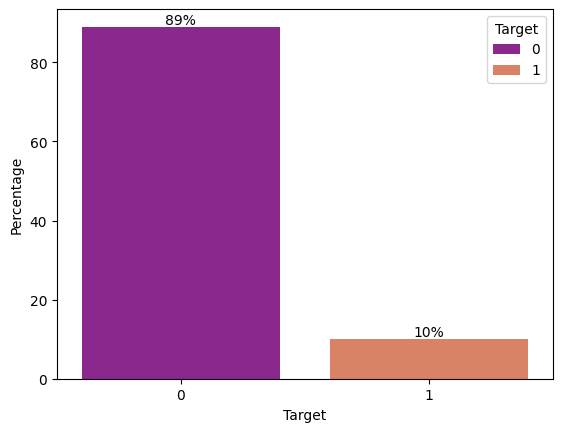

In [12]:
fig, ax1 = plt.subplots()

percentage = (target_trn.value_counts(normalize=True) * 100).astype(int)
perc_df = pd.DataFrame(data={'Target': [0, 1], 'Percentage': percentage})

perc_plot = sns.barplot(data= perc_df, x='Target', y='Percentage', hue=perc_df['Target'], palette='plasma', ax=ax1)
show_bar_perc(ax1)


In [19]:
def check_null(df):
    total = df.isnull().sum()
    perc_null = df.isnull().sum() / len(df) * 100
    null_df = pd.DataFrame(data={'Total': total, 'Percent': perc_null})

    types = []
    for col in df.columns:
        types.append(str(df[col].dtype))
    null_df['Types'] = types

    return null_df

In [21]:
null_count = check_null(training)
scroll_null_count = create_scrollable_table(null_count, 'null_count', 'Checking null (training dataset)')
display(HTML(scroll_null_count))

#No null values

,Total,Percent,Types
ID_code,0,0.0,object
target,0,0.0,int64
var_0,0,0.0,float64
var_1,0,0.0,float64
var_2,0,0.0,float64
var_3,0,0.0,float64
var_4,0,0.0,float64
var_5,0,0.0,float64
var_6,0,0.0,float64
var_7,0,0.0,float64


In [22]:
null_count = check_null(testing)
scroll_null_count = create_scrollable_table(null_count, 'null_count', 'Checking null (testing dataset)')
display(HTML(scroll_null_count))

,Total,Percent,Types
ID_code,0,0.0,object
var_0,0,0.0,float64
var_1,0,0.0,float64
var_2,0,0.0,float64
var_3,0,0.0,float64
var_4,0,0.0,float64
var_5,0,0.0,float64
var_6,0,0.0,float64
var_7,0,0.0,float64
var_8,0,0.0,float64


In [24]:
#Check distribution of each variable for "transaction" and "non-transaction" targets:

import scipy.stats as stats
df = training.drop(['ID_code', 'target'], axis=1)
df_0 = training[training['target']==0]
df_1 = training[training['target']==1]